<a href="https://colab.research.google.com/github/p0mona/university_data_analysis_methods/blob/main/mad_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
fifa = pd.read_csv('https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_08/data/FIFA22_official_data.csv')
fifa = pd.DataFrame(fifa)
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [3]:
pkn = pd.read_csv('https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_08/data/pkn.txt')
pkn = pd.DataFrame(pkn)
pkn.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,PKN,D,19991126,0,15.268,15.403,14.715,15.194,15857000,0
1,PKN,D,19991129,0,15.124,15.194,14.852,14.923,5499196,0
2,PKN,D,19991130,0,15.060,15.330,15.060,15.194,3287087,0
3,PKN,D,19991201,0,15.330,15.674,15.194,15.674,3077747,0
4,PKN,D,19991202,0,15.818,16.297,15.745,15.954,3304014,0


#Zadanie 1

Bazując na powyższych przykładach wykresu radarowego napisz funkcję, która będzie w stanie wyświetlić podobny wykres dla danych ze zbioru FIFA22_official_data.csv (podfolder data). Założenia:

* funkcja przyjmuje jako wektor pandas DataFrame, w którym pierwsza kolumna
to nazwa piłkarza a kolejne kolumny to dowolny podzbiór cech piłkarskich tego zawodnika (od Crossing do GKReflexes),
* funkcja i wykres powinny działać dla zmiennej liczby cech oraz dla zmiennej liczby piłkarzy,
* ustaw stały zakres wartości cech w przedziale [0, 100],
* etykiety osi na wykresie to etykiety kolumn poza nazwą piłkarza,
* każdy piłkarz reprezentowany jest przez inny kolor,
* legenda zawiera również nazwisko piłkarza.

In [4]:
fifa.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,...,892.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,220560.467923,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,...,48.021300,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,38496.607959,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,...,21.904204,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,27.000000,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,4.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,203891.250000,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,...,27.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,229253.000000,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,...,53.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,245368.750000,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,...,67.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,93.000000,90.000000,93.000000,93.000000


In [26]:
cols = fifa.columns.tolist()
player_col = cols[1]
start_idx = cols.index('Crossing')
end_idx = cols.index('GKReflexes')
features = cols[start_idx:end_idx + 1]
df = fifa[[player_col] + features]

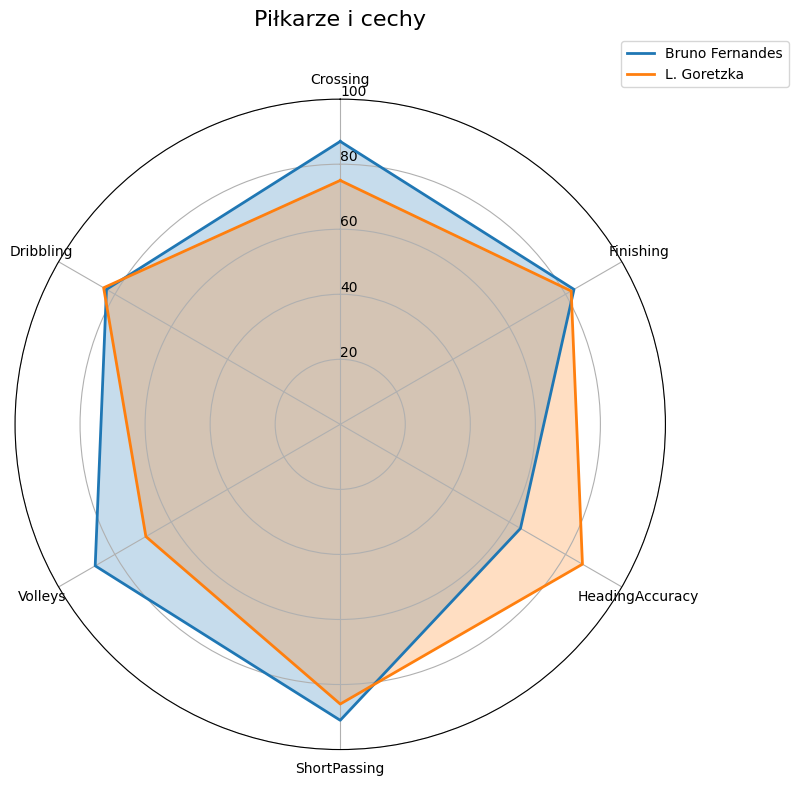

In [27]:
def radar(data):
    selected_players = data.iloc[0:2] # tu możemy zmienić ilość piłkarzy
    players_list = selected_players.iloc[:, 0].tolist()
    features_list = data.columns[1:7].tolist() # tu możemy zmienić ilośc cech
    values = selected_players.iloc[:, 1:7].values # jeżeli zmienimy ilość cech-nie zapominajmy też zmienić drugi parametr

    num_features = len(features_list)
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i, player in enumerate(players_list):
        vals = values[i].tolist()
        vals += vals[:1]
        ax.plot(angles, vals, linewidth=2, label=player)
        ax.fill(angles, vals, alpha=0.25)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 100)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features_list)

    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.title('Piłkarze i cechy', size=16, y = 1.1)
    plt.tight_layout();

radar(df)

#Zadanie 2

Korzystając ze zbioru danych pkn.txt, przygotuj skrypt, który będzie wyświetlał animację wykresu odzwierciedlającą cenę zamknięcia tego waloru. Na osi y powinna znajdować się cena a na osi x kolejny odczyt tej ceny. Przy pierwszym wyświetleniu wykresu pobierz pierwsze 20 wartości, a następnie przy każdej animacji agreguj kolejny odczyt. W miarę możliwości ustaw takie parametry wykresu, aby linia wykresu nie znajdowała się bezpośrednio przy górnej lub prawej krawędzi płótna. Aktualizuj również na osi x daty odczytu wartości waloru w trakcie postępu animacji.

In [28]:
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [31]:
pkn.columns = [column.replace('<', '').replace('>', '') for column in pkn.columns]
pkn.head()

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT
0,PKN,D,19991126,0,15.268,15.403,14.715,15.194,15857000,0
1,PKN,D,19991129,0,15.124,15.194,14.852,14.923,5499196,0
2,PKN,D,19991130,0,15.060,15.330,15.060,15.194,3287087,0
3,PKN,D,19991201,0,15.330,15.674,15.194,15.674,3077747,0
4,PKN,D,19991202,0,15.818,16.297,15.745,15.954,3304014,0


<ipython-input-35-dbfcbb7dc9b4>:10: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  line, = ax.plot_date([], [], '-', lw=2)
<ipython-input-35-dbfcbb7dc9b4>:24: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min(x_data), max(x_data))


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1200x600', '-pix_fmt', 'rgba', '-framerate', '15', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', 'movie.mp4']' returned non-zero exit status 255.

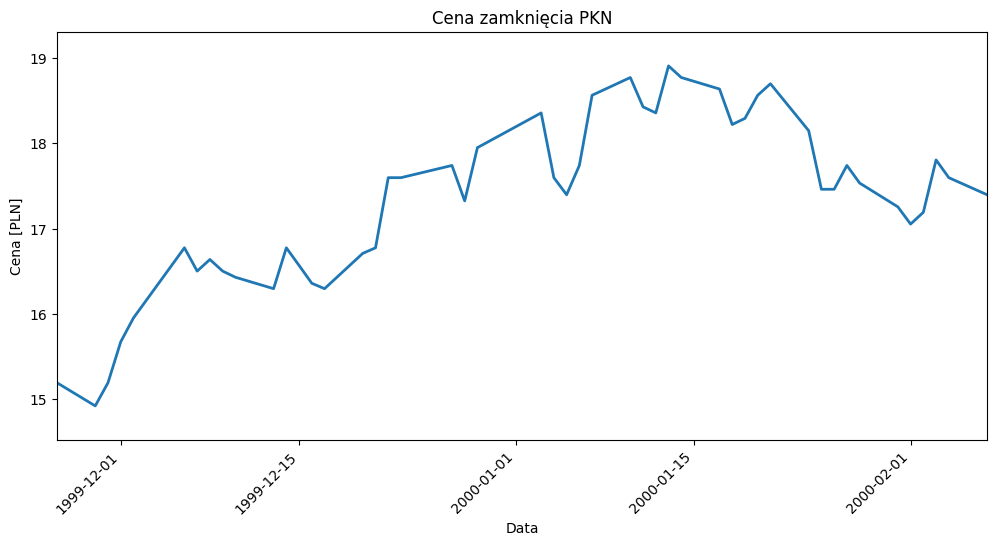

In [35]:
pkn['DATE'] = pd.to_datetime(pkn['DATE'], format='%Y%m%d')

dates = pkn['DATE']
prices = pkn['CLOSE']

x_data = []
y_data = []

fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot_date([], [], '-', lw=2)

ax.margins(x=0.05, y=0.1)
ax.set_title("Cena zamknięcia PKN")
ax.set_xlabel("Data")
ax.set_ylabel("Cena [PLN]")
fig.autofmt_xdate(rotation=45)

def update(frame):
    x_data.append(dates.iloc[frame])
    y_data.append(prices.iloc[frame])
    line.set_data(x_data, y_data)
    ax.relim()
    ax.autoscale_view()
    ax.set_xlim(min(x_data), max(x_data))
    return line,

ani = animation.FuncAnimation(
    fig, update,
    frames=range(20, len(pkn)),
    init_func=lambda: [update(i) for i in range(20)],
    interval=200,
    blit=False,
    repeat=False
)


writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)

# dolączam filmik dla 500

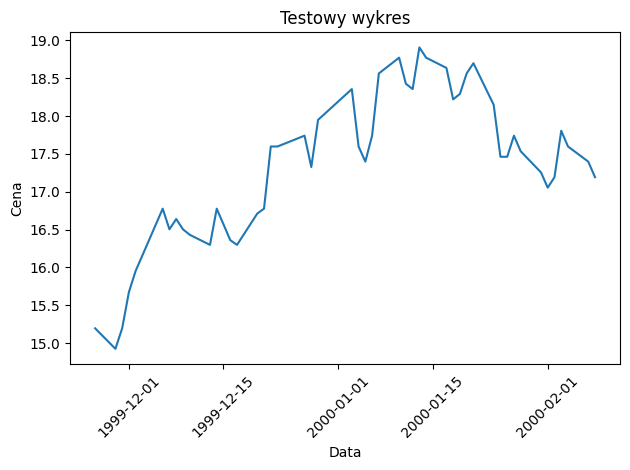

In [37]:
plt.plot(pkn['DATE'][:50], pkn['CLOSE'][:50])
plt.title("Testowy wykres")
plt.xlabel("Data")
plt.ylabel("Cena")
plt.xticks(rotation=45)
plt.tight_layout();

#Zadanie 3

Wykorzystując dane pkn.txt wyrysuj wykres liniowy dla ceny zamknięcia i dodaj do wykresu wskaźniki jak w przykładzie z adnotacjami (przykład 2), które wskażą wartość najmniejszą oraz największą.

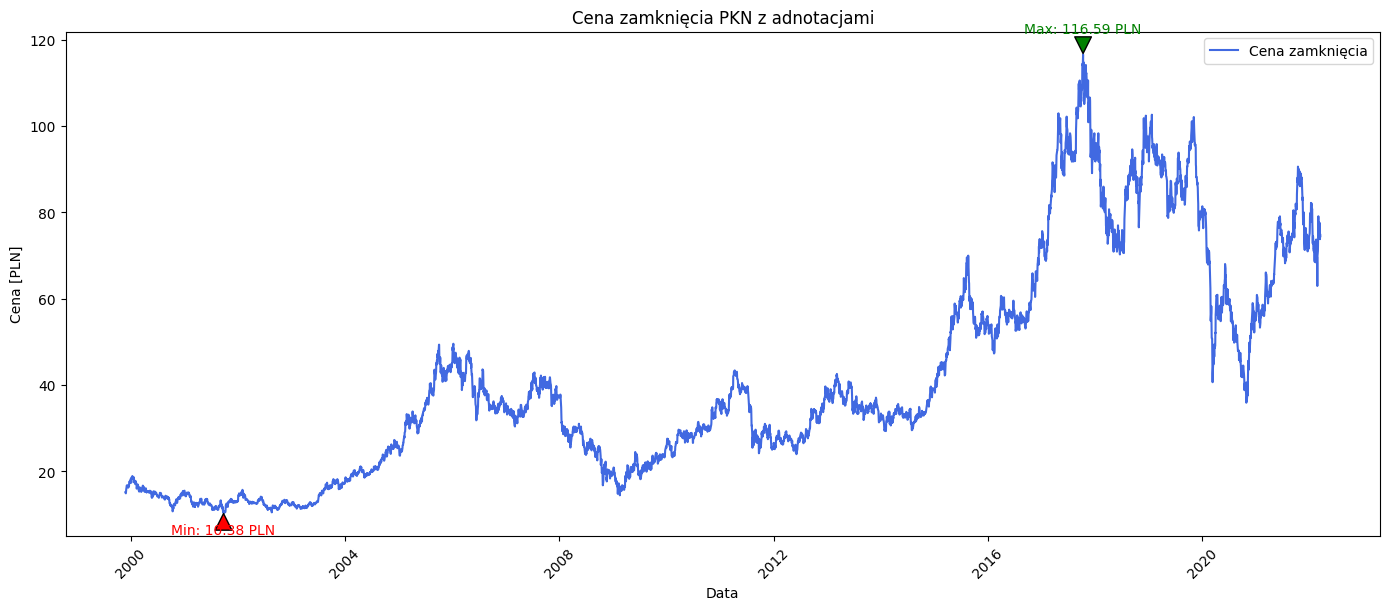

In [38]:
dates = pkn['DATE']
prices = pkn['CLOSE']

min_idx = prices.idxmin()
max_idx = prices.idxmax()

min_date = dates[min_idx]
max_date = dates[max_idx]

min_price = prices[min_idx]
max_price = prices[max_idx]


plt.figure(figsize=(14, 6))
plt.plot(dates, prices, label="Cena zamknięcia", color="royalblue")
plt.title("Cena zamknięcia PKN z adnotacjami")
plt.xlabel("Data")
plt.ylabel("Cena [PLN]")

plt.annotate(f"Min: {min_price:.2f} PLN",
             xy=(min_date, min_price),
             xytext=(min_date, min_price - 5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             ha='center', color='red')

plt.annotate(f"Max: {max_price:.2f} PLN",
             xy=(max_date, max_price),
             xytext=(max_date, max_price + 5),
             arrowprops=dict(facecolor='green', shrink=0.05),
             ha='center', color='green')

plt.tight_layout()
plt.legend()
plt.xticks(rotation=45);

#Zadanie 4

Korzystając z danych pkn.txt pogrupuj dane po roku i miesiącu, znajdź wartość minimalną oraz maksymalną dla kolumny CLOSE, a następnie za pomocą przykładu formatowania danych z punktu 4 zaznacz wartość minimalną i maksymalną w tej kolumnie różnymi stylami (odpowiednio funkcje highlight_min oraz highlight_max).

In [39]:
pkn['Year'] = pkn['DATE'].dt.year
pkn['Month'] = pkn['DATE'].dt.month

grouped = pkn.groupby(['Year', 'Month'])['CLOSE'].agg(['min', 'max']).reset_index()

styled = grouped.style \
    .highlight_min(subset=['min'], color='lightcoral') \
    .highlight_max(subset=['max'], color='lightgreen') \
    .format({'min': '{:.2f}', 'max': '{:.2f}'})

styled

,Year,Month,min,max
0,1999,11,14.92,15.19
1,1999,12,15.67,17.95
2,2000,1,17.26,18.91
3,2000,2,15.33,17.81
4,2000,3,15.27,16.71
5,2000,4,15.12,16.09
6,2000,5,13.96,15.54
7,2000,6,14.23,15.40
8,2000,7,13.89,15.06
9,2000,8,13.48,14.37
